<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/XGBOOST_Clasificaci%C3%B3n_utilizando_XGBoost_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación utilizando XGBoost (Core)**
**Objetivo:** Implementar un pipeline completo de machine learning para un problema de clasificación utilizando XGBoost. Se hará especial énfasis en el Análisis Exploratorio de Datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

**Dataset:** [Heart Disease UCI](https://www.kaggle.com/datasets/ronitf/heart-disease-uci)

**Descripción del Dataset:** El dataset de enfermedades del corazón de la UCI contiene información sobre varios factores de riesgo asociados con enfermedades cardíacas. El objetivo es predecir la presencia de enfermedad cardíaca basándose en estos factores.

**Instrucciones:**

**Parte 1: Carga y Exploración Inicial de Datos**

1.  **Carga del Dataset:**
* Cargar el dataset desde Kaggle.
2.  **Exploración Inicial:**
* Revisar la estructura del dataset.
* Describir las variables y su distribución.
* Identificar y documentar valores faltantes y outliers.

**Parte 2: Análisis Exploratorio de Datos (EDA)**

1.  **Análisis Estadístico Descriptivo:**
* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).
* Analizar la distribución de las variables categóricas.
2.  **Visualizaciones:**
* Crear histogramas y gráficos de barras para entender la distribución de las variables.
* Crear un mapa de calor para visualizar las correlaciones entre las variables.
* Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.
3.  **Valores Faltantes y Outliers:**
* Detectar y tratar valores faltantes.
* Identificar y manejar outliers.

**Parte 3: Preprocesamiento de Datos**

1.  **Transformación de Columnas:**
* Codificar variables categóricas utilizando One-Hot Encoding.
* Escalar características numéricas utilizando StandardScaler.
2.  **División del Conjunto de Datos:**
* Dividir el dataset en conjuntos de entrenamiento y prueba.

**Parte 4: Implementación de XGBoost**

1.  **Entrenamiento del Modelo:**
* Entrenar un modelo de XGBoost con hiperparámetros básicos.
* Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.
2.  **Optimización de Hiperparámetros:**
* Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de XGBoost.
3.  **Evaluación del Modelo Optimizado:**
* Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Estadísticas Descriptivas:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.6

<Figure size 1500x1000 with 0 Axes>

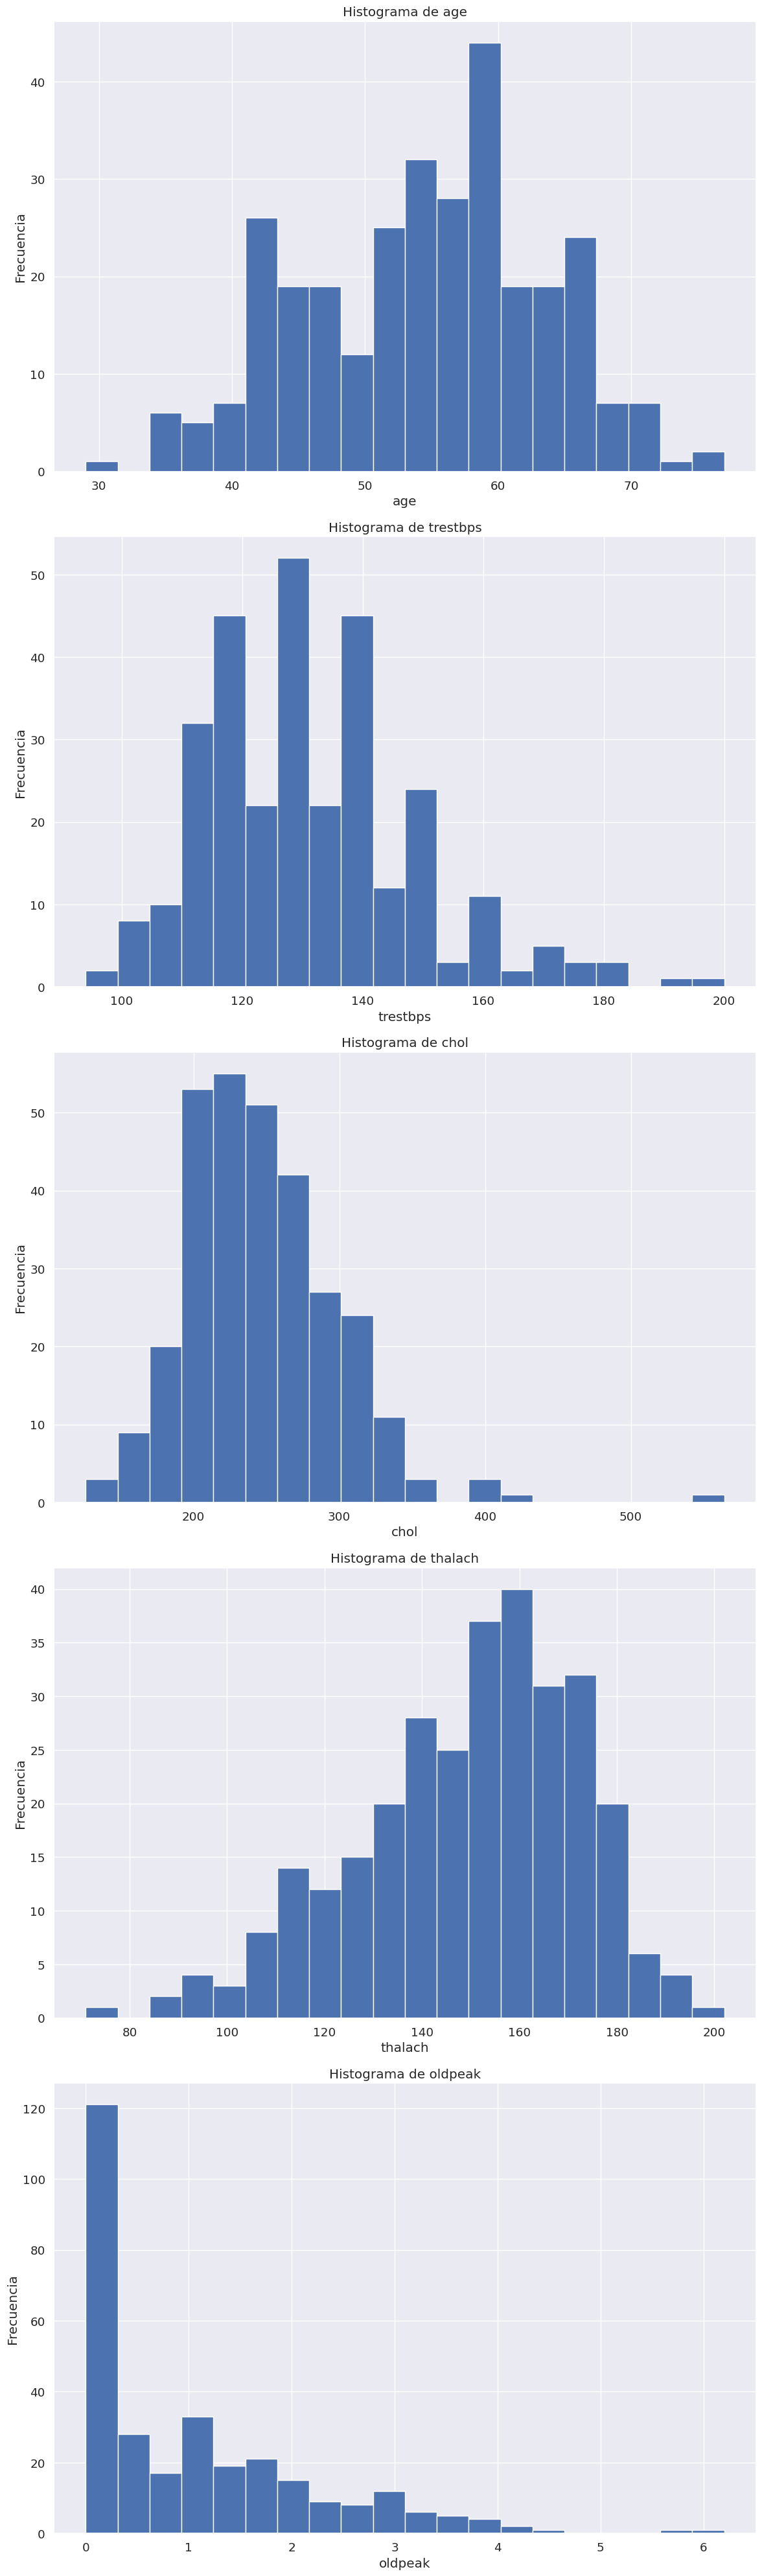

Mejores Hiperparámetros: {'classifier__learning_rate': 0.3, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}


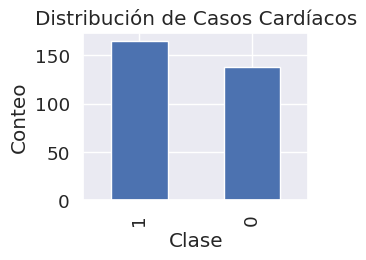

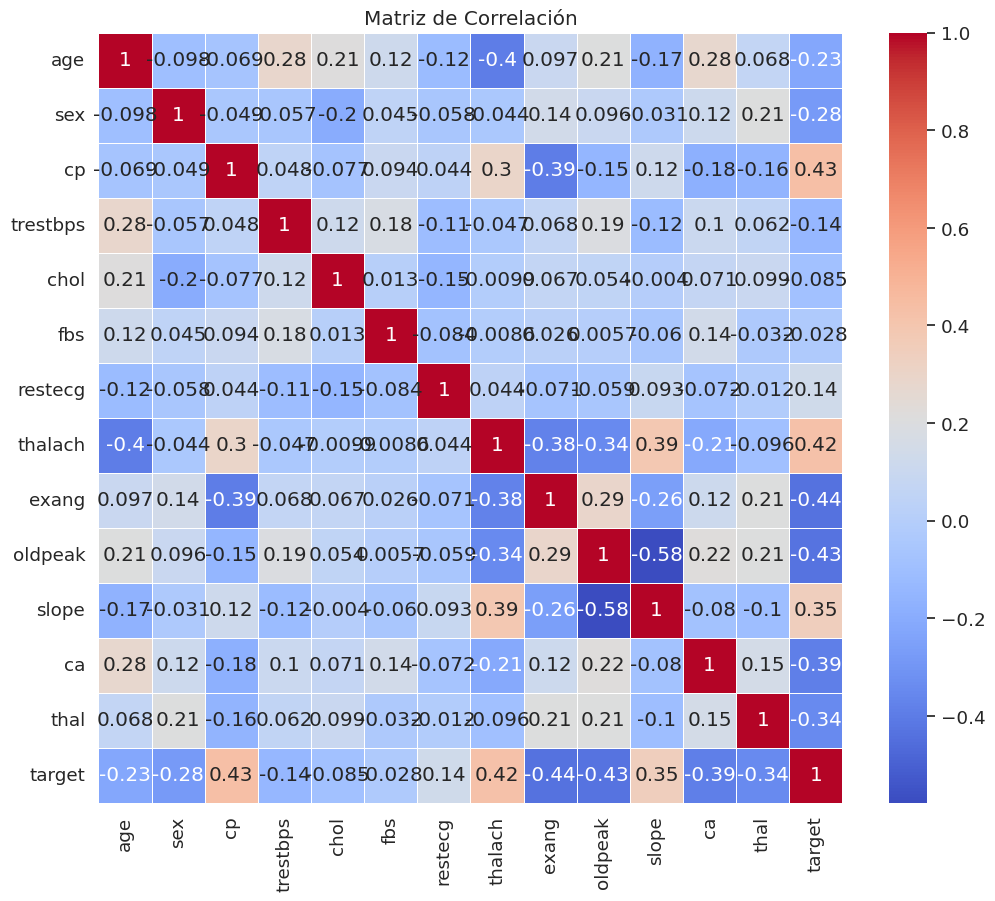

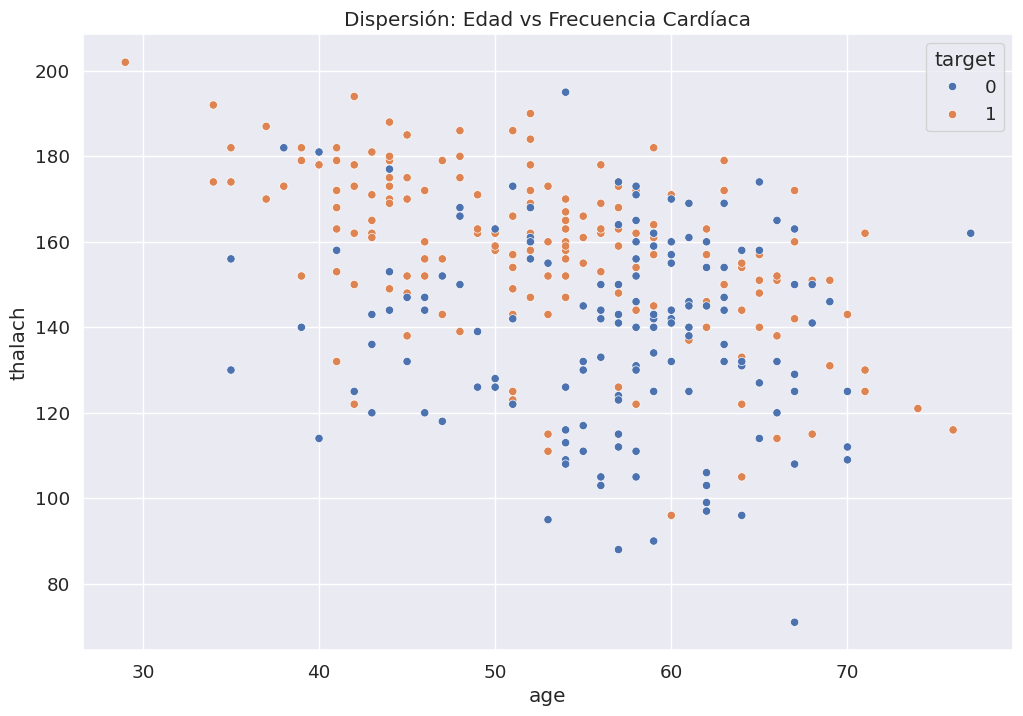

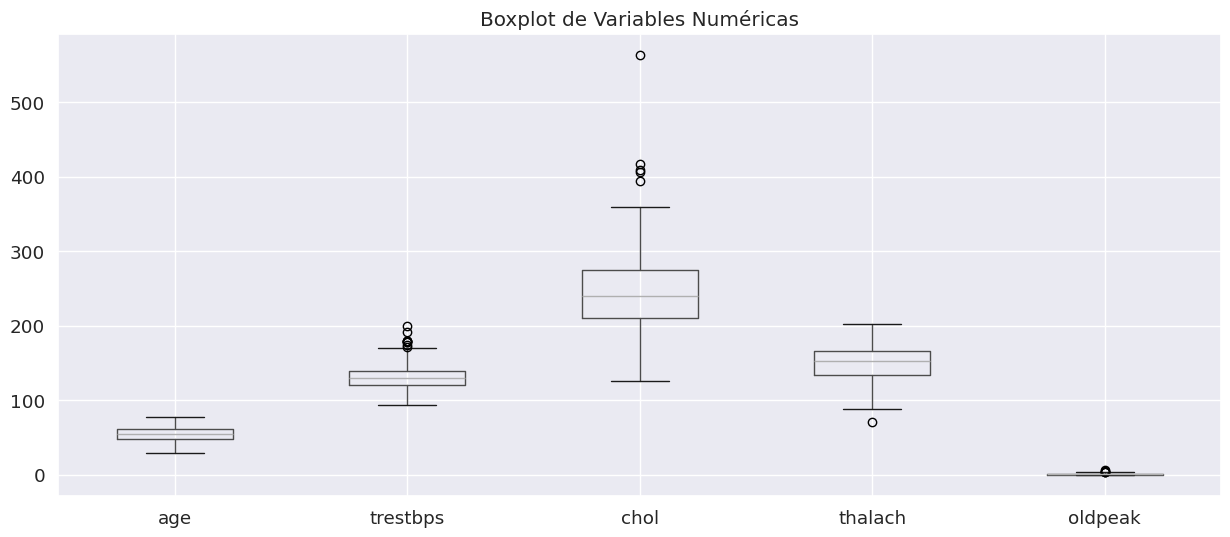

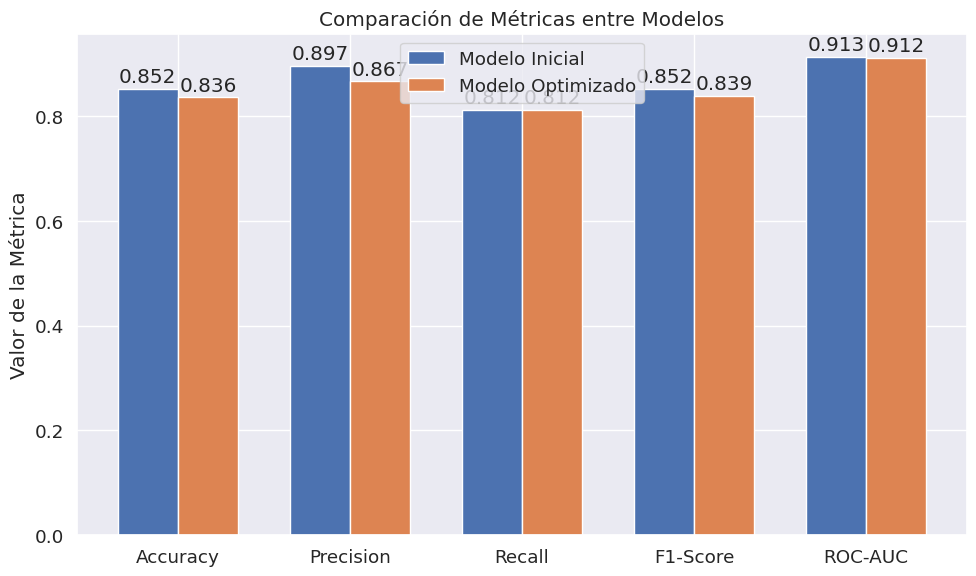


Modelo Inicial:
{'Accuracy': 0.8524590163934426, 'Precision': 0.896551724137931, 'Recall': 0.8125, 'F1-Score': 0.8524590163934426, 'ROC-AUC': 0.9127155172413793}

Modelo Optimizado:
{'Accuracy': 0.8360655737704918, 'Precision': 0.8666666666666667, 'Recall': 0.8125, 'F1-Score': 0.8387096774193549, 'ROC-AUC': 0.9116379310344827}


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb

sns.set_style("whitegrid")
sns.set(font_scale=1.2)

# Cargar datos
from google.colab import files
URL = '/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/Archivos CSV-Tareas/heart.csv'

# Leer el archivo CSV
df = pd.read_csv(URL)

# Parte 1: Exploración Inicial de Datos
# Información general del dataset
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
print(df.describe())

# Verificar valores faltantes
print("\nValores Faltantes:")
print(df.isnull().sum())

# Parte 2: Análisis Exploratorio de Datos (EDA)
# Distribución de variables
plt.figure(figsize=(15,10))

# Histogramas de variables
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(12, 8 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=20)  #
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Distribución de la variable target
plt.subplot(2,2,2)
df['target'].value_counts().plot(kind='bar')
plt.title('Distribución de Casos Cardíacos')
plt.xlabel('Clase')
plt.ylabel('Conteo')

# Mapa de calor de correlaciones
plt.figure(figsize=(12,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')

# Gráfico de dispersión
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='age', y='thalach', hue='target')
plt.title('Dispersión: Edad vs Frecuencia Cardíaca')

# Boxplot para identificar outliers
plt.figure(figsize=(15,6))
df.boxplot(column=numeric_cols)
plt.title('Boxplot de Variables Numéricas')

# Parte 3: Preprocesamiento de Datos
# Separar features y target
X = df.drop('target', axis=1)
y = df['target']

# Identificar columnas categóricas y numéricas
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Preprocesamiento con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Entrenamiento
pipeline.fit(X_train, y_train)

# Predicciones
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Parte 4: Optimización de Hiperparámetros
# Definir grid de hiperparámetros
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.3]
}

# GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Entrenar GridSearch
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores Hiperparámetros:", grid_search.best_params_)

# Predicciones con modelo optimizado
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
y_pred_proba_optimized = best_model.predict_proba(X_test)[:, 1]

# Métricas de evaluación
def evaluar_modelo(y_true, y_pred, y_pred_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_pred_proba)
    }
# Metricas de evaluación para los modelos
initial_metrics = evaluar_modelo(y_test, y_pred, y_pred_proba)
optimized_metrics = evaluar_modelo(y_test, y_pred_optimized, y_pred_proba_optimized)

# Metricas y Valores
metric_names = list(initial_metrics.keys())
initial_values = list(initial_metrics.values())
optimized_values = list(optimized_metrics.values())

x = np.arange(len(metric_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, initial_values, width, label='Modelo Inicial')
rects2 = ax.bar(x + width/2, optimized_values, width, label='Modelo Optimizado')
ax.set_ylabel('Valor de la Métrica')
ax.set_title('Comparación de Métricas entre Modelos')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# Comparar modelos
print("\nModelo Inicial:")
print(evaluar_modelo(y_test, y_pred, y_pred_proba))

print("\nModelo Optimizado:")
print(evaluar_modelo(y_test, y_pred_optimized, y_pred_proba_optimized))

